In [192]:
# исправить:

<a href="https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/сложные%20темы%20pandas/Слияние_данных.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory" target="_blank"></a>

In [97]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

## Объекты datetime, day и time

In [98]:
# объект datetime для 15 декабря 2014 года
datetime(2014, 12, 15)

datetime.datetime(2014, 12, 15, 0, 0)

In [99]:
# задаем конкретную дату, а также время 17:30
datetime(2014, 12, 15, 17, 30)

datetime.datetime(2014, 12, 15, 17, 30)

In [100]:
# получаем текущие дату и время 
# для местного часового пояса
datetime.now()

datetime.datetime(2020, 11, 21, 15, 17, 15, 359101)

In [101]:
# можно записать дату без компонента времени,
# создав дату с помощью объекта datetime
datetime.date(datetime(2014, 12, 15))

datetime.date(2014, 12, 15)

In [102]:
# просто извлекаем текущую дату
datetime.now().date()

datetime.date(2020, 11, 21)

In [103]:
# просто извлекаем время из объекта datetime
datetime.time(datetime(2014, 12, 15, 17, 30))

datetime.time(17, 30)

In [104]:
# получаем текущее местное время
datetime.now().time()

datetime.time(15, 17, 16, 25730)

## Объект Timestamp

In [105]:
# временная метка, представляющая конкретную дату
pd.Timestamp('2014-12-15')

Timestamp('2014-12-15 00:00:00')

In [106]:
# временная метка, содержащая дату и время
pd.Timestamp('2014-12-15 17:30')

Timestamp('2014-12-15 17:30:00')

In [107]:
# задаем временную метку, указав только время
# по умолчанию ко времени будет добавлена
# местная текущая дата
pd.Timestamp('17:30')

Timestamp('2020-11-21 17:30:00')

In [108]:
# получаем текущие дату и время
pd.Timestamp("now")

Timestamp('2020-11-21 15:17:16.864697')

## Объект Timedelta

In [109]:
# вычисляем дату, которая будет отстоять от
# даты 2014-11-30 на один день вперед
today = datetime(2014, 11, 30)
tomorrow = today + pd.Timedelta(days=1)
tomorrow

datetime.datetime(2014, 12, 1, 0, 0)

In [110]:
# вычисляем количество дней между двумя датами
date1 = datetime(2014, 12, 2)
date2 = datetime(2014, 11, 28)
date1 - date2

datetime.timedelta(days=4)

## Объект DatetimeIndex

In [111]:
# создаем очень простой временной ряд с двумя 
# индексными метками и случайными значениями
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.043441
2014-08-02   -1.880009
dtype: float64

In [112]:
# смотрим тип индекса
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [113]:
# можно увидеть, что это коллекция временных меток
type(ts.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [114]:
# создаем временной ряд из списка дат, 
# записанных в виде строк!
np.random.seed(123456)
dates = ['2014-08-01', '2014-08-02']
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.469112
2014-08-02   -0.282863
dtype: float64

In [115]:
# преобразовываем последовательность объектов
# в объект DatetimeIndex
dti = pd.to_datetime(['Aug 1, 2014', 
                      '2014-08-02', 
                      '2014.8.3', 
                      None])
for l in dti: print (l)

2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
NaT


In [117]:
# принудительно выполняем преобразование, значения, которые
# не удалось преобразовать, получат значения NaT
pd.to_datetime(['Aug 1, 2014', 'foo'], errors="coerce")

DatetimeIndex(['2014-08-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [118]:
# создаем диапазон дат, начинающийся с определенной даты
# и включающий определеное количество дней,
# на его основе создаем объект Series
np.random.seed(123456)
periods = pd.date_range('8/1/2014', periods=10)
date_series = pd.Series(np.random.randn(10), index=periods)
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [119]:
# создаем срез, используя позиции индекса
subset = date_series[3:7]
subset

2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [120]:
# создаем объект Series для
# иллюстрации выравнивания
s2 = pd.Series([10, 100, 1000, 10000], subset.index)
s2

2014-08-04       10
2014-08-05      100
2014-08-06     1000
2014-08-07    10000
Freq: D, dtype: int64

In [121]:
# демонстрируем выравнивание по дате,
# сложив вместе date_series и s2
date_series + s2

2014-08-01             NaN
2014-08-02             NaN
2014-08-03             NaN
2014-08-04        8.864368
2014-08-05      101.212112
2014-08-06      999.826785
2014-08-07    10000.119209
2014-08-08             NaN
2014-08-09             NaN
2014-08-10             NaN
Freq: D, dtype: float64

In [122]:
# находим элемент с помощью строкового
# представления даты
date_series['2014-08-05']

1.2121120250208506

In [123]:
# создаем срез объекта DatetimeIndex, задав диапазон 
# из строковых представлений дат
date_series['2014-08-05':'2014-08-07']

2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [124]:
# создаем диапазон дат, охватывающий 2-летний 
# период с ежедневным интервалом
# отбираем лишь те даты, которые 
# относятся к 2013 году
s3 = pd.Series(0, pd.date_range('2013-01-01', '2014-12-31'))
s3['2013']

2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2013-12-27    0
2013-12-28    0
2013-12-29    0
2013-12-30    0
2013-12-31    0
Freq: D, Length: 365, dtype: int64

In [125]:
# отбираем 31 дату за май 2014 года
s3['2014-05'] 

2014-05-01    0
2014-05-02    0
2014-05-03    0
2014-05-04    0
2014-05-05    0
             ..
2014-05-27    0
2014-05-28    0
2014-05-29    0
2014-05-30    0
2014-05-31    0
Freq: D, Length: 31, dtype: int64

In [126]:
# извлекаем даты с августа 
# по сентябрь 2014 года
s3['2014-08':'2014-09']

2014-08-01    0
2014-08-02    0
2014-08-03    0
2014-08-04    0
2014-08-05    0
             ..
2014-09-26    0
2014-09-27    0
2014-09-28    0
2014-09-29    0
2014-09-30    0
Freq: D, Length: 61, dtype: int64

## Создание временного ряда с определенной частотой

In [127]:
# создаем объект Series, состоящий
# из 1-минутных интервалов
np.random.seed(123456)
bymin = pd.Series(np.random.randn(24*60*90), 
                  pd.date_range('2014-08-01', 
                                '2014-10-29 23:59',
                                freq='T'))
bymin[:5]

2014-08-01 00:00:00    0.469112
2014-08-01 00:01:00   -0.282863
2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
Freq: T, dtype: float64

In [128]:
# создаем срез с поминутными
# интервалами
bymin['2014-08-01 00:02':'2014-08-01 00:07']

2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
2014-08-01 00:05:00   -0.173215
2014-08-01 00:06:00    0.119209
2014-08-01 00:07:00   -1.044236
Freq: T, dtype: float64

In [129]:
# создаем серию, состоящую из рабочих дней
days = pd.date_range('2014-08-29', '2014-09-05', freq='B')
days

DatetimeIndex(['2014-08-29', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04', '2014-09-05'],
              dtype='datetime64[ns]', freq='B')

In [130]:
# задаем периоды
pd.date_range('2014-08-01 12:10:01', freq='S', periods=5)

DatetimeIndex(['2014-08-01 12:10:01',
               '2014-08-01 12:10:02',
               '2014-08-01 12:10:03',
               '2014-08-01 12:10:04',
               '2014-08-01 12:10:05'],
              dtype='datetime64[ns]', freq='S')

## Смещения дат

In [131]:
# извлекаем все рабочие дни в промежутке 
# между двумя датами, включая эти даты
dti = pd.date_range('2014-08-29', '2014-09-05', freq='B')
dti.values

array(['2014-08-29T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-09-02T00:00:00.000000000', '2014-09-03T00:00:00.000000000',
       '2014-09-04T00:00:00.000000000', '2014-09-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [132]:
# убеждаемся, что частотой является
# рабочий день
dti.freq

<BusinessDay>

In [133]:
# вычисляем однодневное смещение для 2014-8-29
d = datetime(2014, 8, 29)
do = pd.DateOffset(days = 1) 
d + do

Timestamp('2014-08-30 00:00:00')

In [134]:
# импортируем типы смещений дат
from pandas.tseries.offsets import *
# вычисляем дату, отстоящую от 2014-8-31
# на один рабочий день вперед
d + BusinessDay()

Timestamp('2014-09-01 00:00:00')

In [135]:
# вычисляем дату, отстоящую от 2014-8-31 
# на два рабочих дня вперед
d + 2 * BusinessDay()

Timestamp('2014-09-02 00:00:00')

In [136]:
# вычисляем последний рабочий день месяца,
# следующий после 2014-09-02
d + BMonthEnd()

Timestamp('2014-09-30 00:00:00')

In [137]:
# вычисляем последний рабочий день месяца,
# следующий после 2014-09-15
BMonthEnd().rollforward(datetime(2014, 9, 15))

Timestamp('2014-09-30 00:00:00')

In [138]:
# вычисляем дату вторника, предшествующую
# заданной дате
d - Week(weekday = 1)

Timestamp('2014-08-26 00:00:00')

## Привязанные смещения

In [139]:
# вычисляем все среды в промежутке между 
# 2014-06-01 и 2014-08-31
wednesdays = pd.date_range('2014-06-01', 
                           '2014-07-31', freq="W-WED")
wednesdays.values

array(['2014-06-04T00:00:00.000000000', '2014-06-11T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-06-25T00:00:00.000000000',
       '2014-07-02T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
       '2014-07-16T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [140]:
# вычисляем первый рабочий день последнего 
# месяца в каждом квартале
qends = pd.date_range('2014-01-01', '2014-12-31', 
                      freq='BQS-JUN')
qends.values

array(['2014-03-03T00:00:00.000000000', '2014-06-02T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

## Объект Period

In [141]:
# создаем период - один месяц, начинающийся 
# в августе 2014 года
aug2014 = pd.Period('2014-08', freq='M')
aug2014

Period('2014-08', 'M')

In [142]:
# смотрим начальную и конечную 
# даты этого периода
aug2014.start_time, aug2014.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

In [143]:
# вычисляем период, прибавив к периоду
# aug2014 единицу частоты (один месяц),
# теперь периодом будет сентябрь 2014 года
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

In [144]:
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

## Объект PeriodIndex

In [145]:
# создаем объект PeriodIndex, состоящий 
# из 1-месячных интервалов 2013 года
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04',
             '2013-05', '2013-06', '2013-07', '2013-08',
             '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]', freq='M')

In [146]:
# пробегаем по всем объектам Period в индексе, печатая 
# начальную и конечную даты для каждого объекта
for p in mp2013: 
    print ("{0} {1}".format(p.start_time, p.end_time))

2013-01-01 00:00:00 2013-01-31 23:59:59.999999999
2013-02-01 00:00:00 2013-02-28 23:59:59.999999999
2013-03-01 00:00:00 2013-03-31 23:59:59.999999999
2013-04-01 00:00:00 2013-04-30 23:59:59.999999999
2013-05-01 00:00:00 2013-05-31 23:59:59.999999999
2013-06-01 00:00:00 2013-06-30 23:59:59.999999999
2013-07-01 00:00:00 2013-07-31 23:59:59.999999999
2013-08-01 00:00:00 2013-08-31 23:59:59.999999999
2013-09-01 00:00:00 2013-09-30 23:59:59.999999999
2013-10-01 00:00:00 2013-10-31 23:59:59.999999999
2013-11-01 00:00:00 2013-11-30 23:59:59.999999999
2013-12-01 00:00:00 2013-12-31 23:59:59.999999999


In [147]:
# создаем объект Series, у которого 
# индексом будет PeriodIndex
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2013)
ps[:5]

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
Freq: M, dtype: float64

In [148]:
# создаем объект Series с индексом PeriodIndex, 
# который представляет собой все календарные 
# месяцы-периоды 2013 и 2014 годов
np.random.seed(123456)
ps = pd.Series(np.random.randn(24), 
               pd.period_range('1/1/2013', 
                               '12/31/2014', freq='M'))
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 24, dtype: float64

In [149]:
# извлекаем значение, соответствующее
# периоду 2014-06
ps['2014-06']

0.567020349793672

In [150]:
# извлекаем значения для всех
# периодов в 2014 году
ps['2014']

2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 12, dtype: float64

In [151]:
# извлекаем все значения, соответствующие периодам 
# с марта по июнь 2014 года включительно
ps['2014-03':'2014-06']

2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
Freq: M, dtype: float64

## Обработка праздников с помощью календарей

In [152]:
# демонстрируем использование календаря 
# федеральных праздников США
# сначала нужно импортировать его
from pandas.tseries.holiday import *
# создаем его и демонстрируем, что он
# учитывает праздники
cal = USFederalHolidayCalendar()
for d in cal.holidays(start='2014-01-01', end='2014-12-31'):
    print (d)

2014-01-01 00:00:00
2014-01-20 00:00:00
2014-02-17 00:00:00
2014-05-26 00:00:00
2014-07-04 00:00:00
2014-09-01 00:00:00
2014-10-13 00:00:00
2014-11-11 00:00:00
2014-11-27 00:00:00
2014-12-25 00:00:00


In [153]:
# создаем объект CustomBusinessDay на основе
# календаря федеральных праздников США
cbd = CustomBusinessDay(holidays=cal.holidays())

# теперь вычисляем рабочий день,
# следующий после 2014-8-29
datetime(2014, 8, 29) + cbd

Timestamp('2014-09-02 00:00:00')

## Нормализация временных меток с помощью часовых поясов

In [154]:
# извлекаем текущее местное время и демонстрируем, что 
# по умолчанию информация о часовом поясе отсутствует
now = pd.Timestamp('now')
now, now.tz is None

(Timestamp('2020-11-21 15:17:29.703720'), True)

In [155]:
# по умолчанию DatetimeIndex и его объекты Timestamps
# не содержат информацию о часовом поясе
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')
rng.tz is None, rng[0].tz is None

(True, True)

In [156]:
# импортируем стандартные часовые 
# пояса из библиотеки pytz
from pytz import common_timezones
# выводим первые 5 часовых поясов
common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [157]:
# получаем текущее время и преобразуем в UTC
now = Timestamp("now")
local_now = now.tz_localize('UTC')
now, local_now

(Timestamp('2020-11-21 15:17:30.245084'),
 Timestamp('2020-11-21 15:17:30.245084+0000', tz='UTC'))

In [158]:
# преобразуем временную метку 
# в часовой пояс US/Mountain
tstamp = Timestamp('2014-08-01 12:00:00', tz='US/Mountain')
tstamp

Timestamp('2014-08-01 12:00:00-0600', tz='US/Mountain')

In [159]:
# создаем индекс DatetimeIndex 
# с помощью часового пояса
rng = pd.date_range('3/6/2012 00:00:00', 
                    periods=10, freq='D', tz='US/Mountain')
rng.tz, rng[0].tz

(<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>,
 <DstTzInfo 'US/Mountain' MST-1 day, 17:00:00 STD>)

In [160]:
# демонстрируем использование
# объектов timezone
# необходимо импортировать 
# библиотеку pytz
import pytz
# создаем два часовых пояса
mountain_tz = pytz.timezone("US/Mountain")
eastern_tz = pytz.timezone("US/Eastern")
# применяем оба к временной метке 'now'
mountain_tz.localize(now), eastern_tz.localize(now)

(Timestamp('2020-11-21 15:17:30.245084-0700', tz='US/Mountain'),
 Timestamp('2020-11-21 15:17:30.245084-0500', tz='US/Eastern'))

In [161]:
# создаем два объекта Series с одинаковой 
# начальной датой, одинаковым количеством периодов,
# одинаковой частотой, но с разным часовым поясом
s_mountain = Series(np.arange(0, 5),
                    index=pd.date_range('2014-08-01', 
                                        periods=5, freq="H", 
                                        tz='US/Mountain'))
s_eastern = Series(np.arange(0, 5), 
                   index=pd.date_range('2014-08-01', 
                                       periods=5, freq="H", 
                                       tz='US/Eastern'))
s_mountain

2014-08-01 00:00:00-06:00    0
2014-08-01 01:00:00-06:00    1
2014-08-01 02:00:00-06:00    2
2014-08-01 03:00:00-06:00    3
2014-08-01 04:00:00-06:00    4
Freq: H, dtype: int64

In [162]:
s_eastern

2014-08-01 00:00:00-04:00    0
2014-08-01 01:00:00-04:00    1
2014-08-01 02:00:00-04:00    2
2014-08-01 03:00:00-04:00    3
2014-08-01 04:00:00-04:00    4
Freq: H, dtype: int64

In [163]:
# складываем два объекта Series. В итоге происходит 
# выравнивание только трех элементов
s_eastern + s_mountain

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

In [164]:
# меняем часовой пояс с US/Eastern на US/Pacific
s_pacific = s_eastern.tz_convert("US/Pacific")
s_pacific

2014-07-31 21:00:00-07:00    0
2014-07-31 22:00:00-07:00    1
2014-07-31 23:00:00-07:00    2
2014-08-01 00:00:00-07:00    3
2014-08-01 01:00:00-07:00    4
Freq: H, dtype: int64

In [165]:
# получим тот же результат, что и при сложении 
# s_eastern и s_mountain, поскольку часовые 
# пояса будут выровнены так же
s_mountain + s_pacific

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

## Опережение и запаздывание

In [166]:
# создаем объект Series, с которым
# будем работать
np.random.seed(123456)
ts = Series([1, 2, 2.5, 1.5, 0.5],
            pd.date_range('2014-08-01', periods=5))
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [167]:
# сдвигаем значения на
# 1 день вперед
ts.shift(1)

2014-08-01    NaN
2014-08-02    1.0
2014-08-03    2.0
2014-08-04    2.5
2014-08-05    1.5
Freq: D, dtype: float64

In [168]:
# сдвигаем значения на
# 2 дня назад
ts.shift(-2)

2014-08-01    2.5
2014-08-02    1.5
2014-08-03    0.5
2014-08-04    NaN
2014-08-05    NaN
Freq: D, dtype: float64

In [169]:
# вычисляем ежедневное процентное
# изменения
ts / ts.shift(1)

2014-08-01         NaN
2014-08-02    2.000000
2014-08-03    1.250000
2014-08-04    0.600000
2014-08-05    0.333333
Freq: D, dtype: float64

In [170]:
# сдвигаем вперед на один
# рабочий день
ts.shift(1, freq="B")

2014-08-04    1.0
2014-08-04    2.0
2014-08-04    2.5
2014-08-05    1.5
2014-08-06    0.5
dtype: float64

In [171]:
# сдвигаем на 5 часов вперед
ts.tshift(5, freq="H")

<ipython-input-171-6a7f3c0e60ed>:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ts.tshift(5, freq="H")


2014-08-01 05:00:00    1.0
2014-08-02 05:00:00    2.0
2014-08-03 05:00:00    2.5
2014-08-04 05:00:00    1.5
2014-08-05 05:00:00    0.5
Freq: D, dtype: float64

In [172]:
# сдвигаем с помощью объекта DateOffset
ts.shift(1, DateOffset(minutes=0.5))

2014-08-01 00:00:30    1.0
2014-08-02 00:00:30    2.0
2014-08-03 00:00:30    2.5
2014-08-04 00:00:30    1.5
2014-08-05 00:00:30    0.5
dtype: float64

In [173]:
# просто сдвигаем индексные метки
# на 1 час назад
ts.tshift(-1, freq='H')

<ipython-input-173-5447acffabcf>:3: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ts.tshift(-1, freq='H')


2014-07-31 23:00:00    1.0
2014-08-01 23:00:00    2.0
2014-08-02 23:00:00    2.5
2014-08-03 23:00:00    1.5
2014-08-04 23:00:00    0.5
Freq: D, dtype: float64

## Преобразование частоты

In [174]:
# создаем серию последовательно возрастающих значений,
# представляющих собой часовые интервалы
# всех дней августа 2014 года
periods = 31 * 24
hourly = Series(np.arange(0, periods),
               pd.date_range('08-01-2014', freq="1H", 
                             periods = periods))
hourly[:5]

2014-08-01 00:00:00    0
2014-08-01 01:00:00    1
2014-08-01 02:00:00    2
2014-08-01 03:00:00    3
2014-08-01 04:00:00    4
Freq: H, dtype: int64

In [175]:
# преобразуем ежечасовую частоту 
# временного ряда в ежесуточную
# многие элементы будут удалены
# из-за выравнивания
daily = hourly.asfreq('D')
daily[:5]

2014-08-01     0
2014-08-02    24
2014-08-03    48
2014-08-04    72
2014-08-05    96
Freq: D, dtype: int64

In [176]:
# преобразуем обратно в ежечасовую частоту, в результате
# получим множество значений NaN, поскольку новый индекс
# содержит много меток, не соответствующих меткам 
# исходного временного ряда
daily.asfreq('H')

2014-08-01 00:00:00      0.0
2014-08-01 01:00:00      NaN
2014-08-01 02:00:00      NaN
2014-08-01 03:00:00      NaN
2014-08-01 04:00:00      NaN
                       ...  
2014-08-30 20:00:00      NaN
2014-08-30 21:00:00      NaN
2014-08-30 22:00:00      NaN
2014-08-30 23:00:00      NaN
2014-08-31 00:00:00    720.0
Freq: H, Length: 721, dtype: float64

In [177]:
# выполняем прямое заполнение значений
daily.asfreq('H', method='ffill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00      0
2014-08-01 02:00:00      0
2014-08-01 03:00:00      0
2014-08-01 04:00:00      0
                      ... 
2014-08-30 20:00:00    696
2014-08-30 21:00:00    696
2014-08-30 22:00:00    696
2014-08-30 23:00:00    696
2014-08-31 00:00:00    720
Freq: H, Length: 721, dtype: int64

In [178]:
daily.asfreq('H', method='bfill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00     24
2014-08-01 02:00:00     24
2014-08-01 03:00:00     24
2014-08-01 04:00:00     24
                      ... 
2014-08-30 20:00:00    720
2014-08-30 21:00:00    720
2014-08-30 22:00:00    720
2014-08-30 23:00:00    720
2014-08-31 00:00:00    720
Freq: H, Length: 721, dtype: int64

## Увеличение или уменьшение шага дискретизации временного ряда

In [179]:
# сгенерируем случайное блуждание за 5 дней
# по 1-секундным интервалам
# получим большое количество значений
count = 24 * 60 * 60 * 5
# создаем серию значений
np.random.seed(123456)
values = np.random.randn(count)
ws = pd.Series(values)
# вычисляем накопленную сумму
walk = ws.cumsum()
# создаем индекс
walk.index = pd.date_range('2014-08-01', periods=count, freq="S")
walk

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.186249
2014-08-01 00:00:02     -1.322810
2014-08-01 00:00:03     -2.458442
2014-08-01 00:00:04     -1.246330
                          ...    
2014-08-05 23:59:55    456.529763
2014-08-05 23:59:56    456.052131
2014-08-05 23:59:57    455.202981
2014-08-05 23:59:58    454.947362
2014-08-05 23:59:59    456.191430
Freq: S, Length: 432000, dtype: float64

In [180]:
# уменьшаем шаг дискретизации, преобразуем
# односекундные интервалы в одноминутные
walk.resample("1Min").mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:01:00    -15.239213
2014-08-01 00:02:00     -9.179315
2014-08-01 00:03:00     -8.338307
2014-08-01 00:04:00     -8.129554
                          ...    
2014-08-05 23:55:00    453.773467
2014-08-05 23:56:00    450.857039
2014-08-05 23:57:00    450.078149
2014-08-05 23:58:00    444.637806
2014-08-05 23:59:00    453.837417
Freq: T, Length: 7200, dtype: float64

In [181]:
# вычисляем среднее значение первой
# минуты блуждания
walk['2014-08-01 00:00'].mean()

-8.718220052832644

In [182]:
# используем интервалы,
# закрытые справа
walk.resample("1Min", closed='right').mean()

2014-07-31 23:59:00      0.469112
2014-08-01 00:00:00     -8.907477
2014-08-01 00:01:00    -15.280685
2014-08-01 00:02:00     -9.083865
2014-08-01 00:03:00     -8.285550
                          ...    
2014-08-05 23:55:00    453.726168
2014-08-05 23:56:00    450.849039
2014-08-05 23:57:00    450.039159
2014-08-05 23:58:00    444.631719
2014-08-05 23:59:00    453.955377
Freq: T, Length: 7201, dtype: float64

In [183]:
# преобразовываем в 1-минутные интервалы
walk.resample("1Min").first()

2014-08-01 00:00:00      0.469112
2014-08-01 00:01:00    -10.886314
2014-08-01 00:02:00    -13.374656
2014-08-01 00:03:00     -7.647693
2014-08-01 00:04:00     -4.482292
                          ...    
2014-08-05 23:55:00    452.900335
2014-08-05 23:56:00    450.062374
2014-08-05 23:57:00    449.582419
2014-08-05 23:58:00    447.243014
2014-08-05 23:59:00    446.877810
Freq: T, Length: 7200, dtype: float64

In [184]:
# преобразовываем в 1-минутные интервалы, 
# а затем в 1-секундные
bymin = walk.resample("1Min").mean()
bymin.resample('S').mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01           NaN
2014-08-01 00:00:02           NaN
2014-08-01 00:00:03           NaN
2014-08-01 00:00:04           NaN
                          ...    
2014-08-05 23:58:56           NaN
2014-08-05 23:58:57           NaN
2014-08-05 23:58:58           NaN
2014-08-05 23:58:59           NaN
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [185]:
# преобразуем в 1-секундные интервалы, 
# используя обратное заполнение
bymin.resample("S").bfill()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01    -15.239213
2014-08-01 00:00:02    -15.239213
2014-08-01 00:00:03    -15.239213
2014-08-01 00:00:04    -15.239213
                          ...    
2014-08-05 23:58:56    453.837417
2014-08-05 23:58:57    453.837417
2014-08-05 23:58:58    453.837417
2014-08-05 23:58:59    453.837417
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [186]:
# демонстрируем интерполяцию значений NaN
interpolated = bymin.resample("S").interpolate()
interpolated

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01     -8.826903
2014-08-01 00:00:02     -8.935586
2014-08-01 00:00:03     -9.044270
2014-08-01 00:00:04     -9.152953
                          ...    
2014-08-05 23:58:56    453.224110
2014-08-05 23:58:57    453.377437
2014-08-05 23:58:58    453.530764
2014-08-05 23:58:59    453.684090
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [187]:
# демонстрируем передискретизацию ohlc
ohlc = walk.resample("H").ohlc()
ohlc

                           open        high         low  \
2014-08-01 00:00:00    0.469112    0.469112  -67.873166   
2014-08-01 01:00:00   -3.374321   23.793007  -56.585154   
2014-08-01 02:00:00  -54.276885    5.232441  -87.809456   
2014-08-01 03:00:00    0.260576   17.124638  -65.820652   
2014-08-01 04:00:00  -38.436581    3.537231 -109.805294   
...                         ...         ...         ...   
2014-08-05 19:00:00  437.652077  550.408942  430.549178   
2014-08-05 20:00:00  496.539759  510.371745  456.365565   
2014-08-05 21:00:00  476.025498  506.952877  425.472410   
2014-08-05 22:00:00  497.941355  506.599652  411.119919   
2014-08-05 23:00:00  443.017962  489.083657  426.062444   

                          close  
2014-08-01 00:00:00   -2.922520  
2014-08-01 01:00:00  -55.101543  
2014-08-01 02:00:00    1.913276  
2014-08-01 03:00:00  -38.530620  
2014-08-01 04:00:00  -61.014553  
...                         ...  
2014-08-05 19:00:00  494.471788  
2014-08-05 20:00:00

## Применение к временному ряду операций на основе скользящего окна

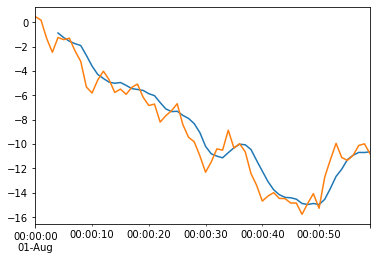

In [188]:
# извлекаем данные по одному 1-минутному интервалу
first_minute = walk['2014-08-01 00:00']
# вычисляем скользящее среднее с шириной окна 5 периодов
means = first_minute.rolling(window=5, center=False).mean()
# сравним средние с исходными данными
means.plot()
first_minute.plot();

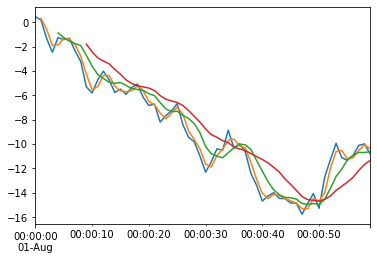

In [189]:
# демонстрируем разницу между скользящими
# окнами шириной 2, 5 и 10
h1w = walk['2014-08-01 00:00']
means2 = h1w.rolling(window=2, center=False).mean()
means5 = h1w.rolling(window=5, center=False).mean()
means10 = h1w.rolling(window=10, center=False).mean()
h1w.plot()
means2.plot()
means5.plot()
means10.plot();

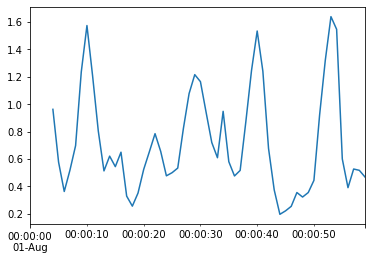

In [190]:
# вычисляем среднее абсолютное значение 
# для окна с 5 интервалами
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
means = h1w.rolling(window=5, center=False).apply(mean_abs_dev, raw=True)
means.plot();

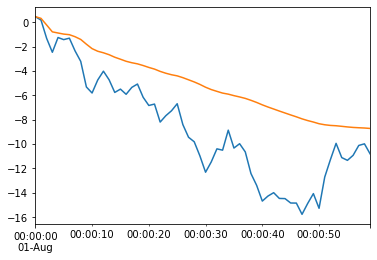

In [191]:
# вычисляем среднее с расширяющимся окном
h1w.plot()
expanding = h1w.expanding(min_periods=1).mean()
expanding.plot();